In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from sklearn.metrics import silhouette_score, homogeneity_score, adjusted_rand_score, completeness_score, adjusted_mutual_info_score
from scipy.stats import kurtosis

In [3]:
from sklearn.datasets import load_breast_cancer
data_breast = load_breast_cancer()

data_features = data_breast.data
data_label = data_breast.target

In [4]:
def plot_graphs(param, curves, curve_labels, param_name="", curve_name=""):
    colors = ['deepskyblue', 'red', 'yellow', 'green', 'midnightblue', 'fuchsia']
    plt.figure()
    lines = []
    for i in range(len(curve_labels)):
        l, = plt.plot(param, curves[i,:], ls='-', marker='+', color=colors[i])
        lines.append(l)
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    
    plt.legend(handles=lines, labels=curve_labels, loc='best')
    plt.show()

Clustering

In [5]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [6]:
def k_means_clustering(n=2, ini='k-means++', n_ini=10, it=300, t=1e-4, pre='auto', x=True, job=None, algo="auto"):
    
    kmeans = KMeans(n_clusters = n, init = ini, n_init = n_ini, max_iter = it, tol = t, precompute_distances = pre,
                    copy_x = x, n_jobs = job, algorithm = algo, random_state = 5)
    kmeans.fit(data_features)
    km_pred = kmeans.predict(data_features)
    
    sli_score = silhouette_score(data_features, km_pred, metric='euclidean')
    homo_score = homogeneity_score(data_label, km_pred)
    adj_score = adjusted_rand_score(data_label, km_pred)
    adj_mut_score = adjusted_mutual_info_score(data_label, km_pred)
    comp_score = completeness_score(data_label, km_pred)
    
    r = np.zeros((1,5))
    r[0,0] = sli_score
    r[0,1] = homo_score
    r[0,2] = adj_score
    r[0,3] = adj_mut_score
    r[0,4] = comp_score
    return r

In [7]:
km_cluster_size = [2,3,4,5,6,7,8,9,10]
l_km_cluster = len(km_cluster_size)
km_cluster_scores = np.zeros((5,l_km_cluster))
for i in range(l_km_cluster):
    km_cluster_scores[:,i] = k_means_clustering(n=km_cluster_size[i])

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

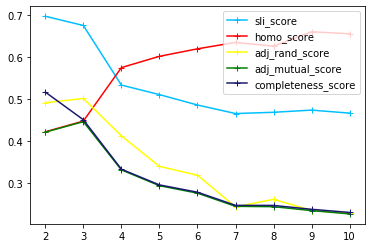

In [8]:
plot_graphs(km_cluster_size, km_cluster_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [10]:
kmeans = KMeans(n_clusters = 2)
kmeans = kmeans.fit_predict(data_features)

homo_score = homogeneity_score(data_label, kmeans)
adj_score = adjusted_rand_score(data_label, kmeans)
adj_mut_score = adjusted_mutual_info_score(data_label, kmeans)
comp_score = completeness_score(data_label, kmeans)
print(homo_score)
print(adj_score)
print(adj_mut_score)
print(comp_score)

0.42229071246999117
0.49142453622455523
0.42151741598216214
0.5168089972809706


/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


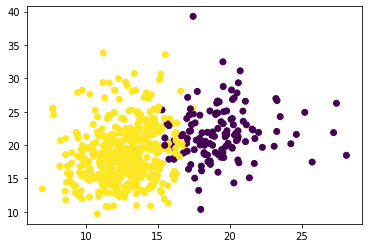

In [11]:
plt.scatter(data_features[:,0], data_features[:,1], c=kmeans)
plt.show()

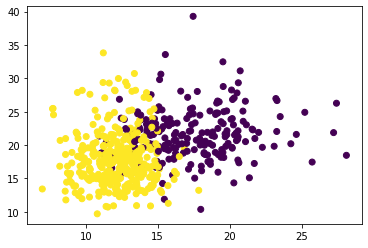

In [12]:
plt.scatter(data_features[:,0], data_features[:,1], c=data_label)
plt.show()

In [13]:
def em_clustering(n=2, cov='full', t=0.001, reg=1e-06, it=100, init='kmeans', w=None, means=None, pre=None, warm=False):
    
    em = GaussianMixture(n_components=n, covariance_type=cov, tol=t, reg_covar=reg, max_iter=it,
                        init_params=init, weights_init=w, means_init=means, precisions_init=pre,
                        random_state=None, warm_start=warm)
    
    em_predict = em.fit_predict(data_features)
    
    sli_score = silhouette_score(data_features, em_predict)
    homo_score = homogeneity_score(data_label, em_predict)
    adj_score = adjusted_rand_score(data_label, em_predict)
    adj_mut_score = adjusted_mutual_info_score(data_label, em_predict)
    comp_score = completeness_score(data_label, em_predict)
    
    r = np.zeros((1,5))
    r[0,0] = sli_score
    r[0,1] = homo_score
    r[0,2] = adj_score
    r[0,3] = adj_mut_score
    r[0,4] = comp_score
    
    return r

In [14]:
em_cluster_size = [2,3,4,5,6,7,8,9,10]
l_em_cluster = len(em_cluster_size)
em_cluster_scores = np.zeros((5,l_em_cluster))
for i in range(l_em_cluster):
    em_cluster_scores[:,i] = em_clustering(n=em_cluster_size[i])

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

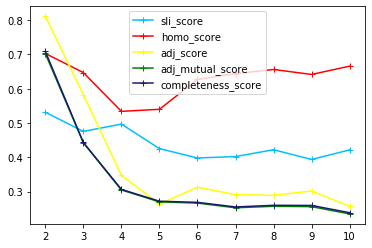

In [15]:
plot_graphs(em_cluster_size, em_cluster_scores, ["sli_score", "homo_score", "adj_score", "adj_mutual_score", "completeness_score"])

In [16]:
cluster_em = GaussianMixture(n_components = 2)
cluster_em = cluster_em.fit_predict(data_features)

homo_score = homogeneity_score(data_label, cluster_em)
adj_score = adjusted_rand_score(data_label, cluster_em)
adj_mut_score = adjusted_mutual_info_score(data_label, cluster_em)
comp_score = completeness_score(data_label, cluster_em)
print(homo_score)
print(adj_score)
print(adj_mut_score)
print(comp_score)

0.7030594222565626
0.8116318038862359
0.7026624605116605
0.7092182790386102


/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


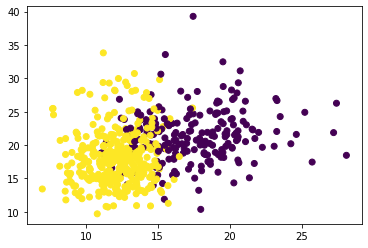

In [17]:
plt.scatter(data_features[:,0], data_features[:,1], c=cluster_em)
plt.show()

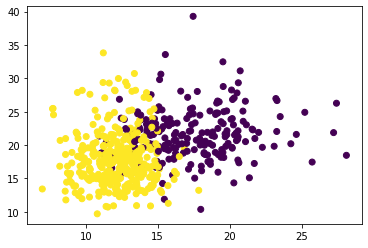

In [18]:
plt.scatter(data_features[:,0], data_features[:,1], c=data_label)
plt.show()

Dimensionality Reduction

In [23]:
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as SRP
from sklearn.feature_selection import SelectPercentile as SP

In [94]:
def dr_pca(n):
    pca = PCA(n_components=n, random_state=3)
    x_pca = pca.fit(data_features)
    
    cum = np.cumsum(pca.explained_variance_ratio_)
    
    fig, x1 = plt.subplots()
    x1.plot(list(range(len(pca.explained_variance_ratio_))), cum, 'b-')
    x1.set_xlabel('Principal components')
    x1.set_ylabel('Cumulative explained variance ratio', color='b')
    x1.tick_params('y', colors='b')
    
    x2 = x1.twinx()
    x2.plot(list(range(len(pca.singular_values_))), pca.singular_values_, 'm-')
    x2.set_ylabel('Eigenvalues', color='m')
    x2.tick_params('y', colors='m')
    
    plt.show()

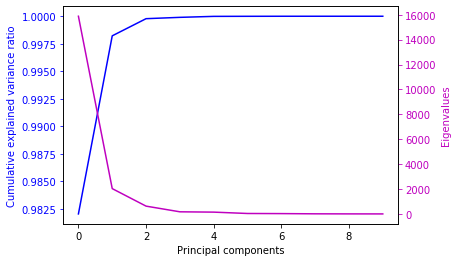

In [96]:
dr_pca(10)

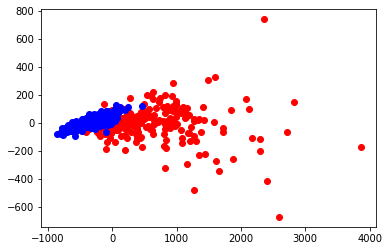

In [97]:
pca = PCA(n_components=2, random_state=3)
x_pca = pca.fit_transform(data_features)

cls_0 = []
cls_1 = []

for i in range(len(data_label)):
    if(data_label[i] == 0):
        cls_0.append(x_pca[i, :])
    elif(data_label[i] == 1):
        cls_1.append(x_pca[i, :])
plt.plot(np.asarray(cls_0)[:,0], np.asarray(cls_0)[:,1], 'ro')
plt.plot(np.asarray(cls_1)[:,0], np.asarray(cls_1)[:,1], 'bo')

plt.show()

In [98]:
def dr_ica(n=2):
    ica = ICA(n_components=n, random_state=3)
    
    x_ica = ica.fit_transform(data_features)
    
    r = np.mean(kurtosis(x_ica))
    
    return r

In [100]:
list_ica_n = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
len_ica_n = len(list_ica_n)
scores_ica_n = np.zeros((1,len_ica_n))
for i in range(len_ica_n):
    scores_ica_n[0,i] = dr_ica(n=list_ica_n[i])

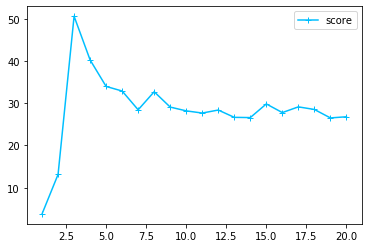

In [101]:
plot_graphs(list_ica_n, scores_ica_n,["score"])

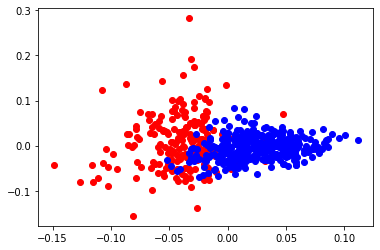

In [102]:
ica = ICA(n_components=4, random_state=3)
x_ica = ica.fit_transform(data_features)

cls_0 = []
cls_1 = []

for i in range(len(data_label)):
    if(data_label[i] == 0):
        cls_0.append(x_ica[i, :])
    elif(data_label[i] == 1):
        cls_1.append(x_ica[i, :])
plt.plot(np.asarray(cls_0)[:,0], np.asarray(cls_0)[:,1], 'ro')
plt.plot(np.asarray(cls_1)[:,0], np.asarray(cls_1)[:,1], 'bo')

plt.show()

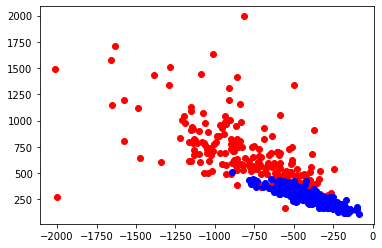

In [105]:
rca = GRP(n_components=2, random_state=3)
x_rca = rca.fit_transform(data_features)

cls_0 = []
cls_1 = []

for i in range(len(data_label)):
    if(data_label[i] == 0):
        cls_0.append(x_rca[i, :])
    elif(data_label[i] == 1):
        cls_1.append(x_rca[i, :])
plt.plot(np.asarray(cls_0)[:,0], np.asarray(cls_0)[:,1], 'ro')
plt.plot(np.asarray(cls_1)[:,0], np.asarray(cls_1)[:,1], 'bo')

plt.show()

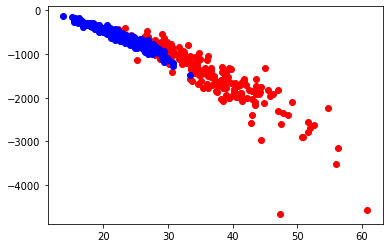

In [76]:
rca = SRP(n_components=2, random_state=3)
x_rca = rca.fit_transform(data_features)

cls_0 = []
cls_1 = []

for i in range(len(data_label)):
    if(data_label[i] == 0):
        cls_0.append(x_rca[i, :])
    elif(data_label[i] == 1):
        cls_1.append(x_rca[i, :])
plt.plot(np.asarray(cls_0)[:,0], np.asarray(cls_0)[:,1], 'ro')
plt.plot(np.asarray(cls_1)[:,0], np.asarray(cls_1)[:,1], 'bo')

plt.show()

In [106]:
from sklearn import feature_selection
func_chi2 = feature_selection.chi2
func_classif = feature_selection.f_classif
func_mut_reg = feature_selection.mutual_info_regression

In [107]:
def dr_sp(f, p=20):
    sp = SP(percentile=p, score_func=f)
    x_transformed = sp.fit_transform(data_features, data_label)
    print(sp.scores_)
    return sp.scores_

In [108]:
scores_sp_classif = dr_sp(f=func_classif, p=20)

[6.46981021e+02 1.18096059e+02 6.97235272e+02 5.73060747e+02
 8.36511234e+01 3.13233079e+02 5.33793126e+02 8.61676020e+02
 6.95274435e+01 9.34592949e-02 2.68840327e+02 3.90947023e-02
 2.53897392e+02 2.43651586e+02 2.55796780e+00 5.32473391e+01
 3.90144816e+01 1.13262760e+02 2.41174067e-02 3.46827476e+00
 8.60781707e+02 1.49596905e+02 8.97944219e+02 6.61600206e+02
 1.22472880e+02 3.04341063e+02 4.36691939e+02 9.64385393e+02
 1.18860232e+02 6.64439606e+01]


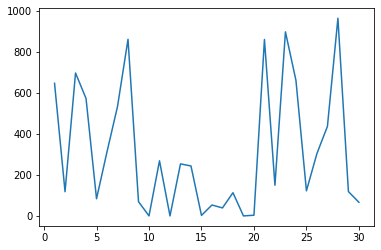

In [109]:
plt.figure()
plt.plot(range(1, 31), scores_sp_classif)
plt.show()

[2.66104917e+02 9.38975081e+01 2.01110286e+03 5.39916559e+04
 1.49899264e-01 5.40307549e+00 1.97123536e+01 1.05440354e+01
 2.57379775e-01 7.43065536e-05 3.46752472e+01 9.79353970e-03
 2.50571896e+02 8.75850471e+03 3.26620664e-03 6.13785332e-01
 1.04471761e+00 3.05231563e-01 8.03633831e-05 6.37136566e-03
 4.91689157e+02 1.74449400e+02 3.66503542e+03 1.12598432e+05
 3.97365694e-01 1.93149220e+01 3.95169151e+01 1.34854195e+01
 1.29886140e+00 2.31522407e-01]


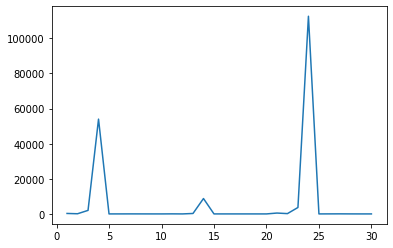

In [35]:
scores_sp_chi2 = dr_sp(f=func_chi2, p=20)
plt.figure()
plt.plot(range(1, 31), scores_sp_chi2)
plt.show()

Clustering after dimension reduction

In [36]:
def pca_features(n):
    pca = PCA(n_components=n, random_state=3)
    x_pca = pca.fit_transform(data_features)
    
    return x_pca

In [37]:
def ica_features(n):
    ica = ICA(n_components=n, random_state=3)
    x_ica = ica.fit_transform(data_features)
    
    return x_ica

In [53]:
def rca_features(n=5, r=5):
    rca = GRP(n_components=n, random_state=r)
    rca.fit(data_features)
    x_rca = rca.transform(data_features)
    
    return x_rca

In [39]:
def sp_features(f=func_classif, p=50):
    sp = SP(percentile=p, score_func=f)
    x_transformed = sp.fit_transform(data_features, data_label)
    return x_transformed

In [43]:
def k_means_dim_red(trans_features, n=2, ini='k-means++', n_ini=10, it=300, t=1e-4, pre='auto', x=True, job=None, algo="auto"):
    
    kmeans = KMeans(n_clusters = n, init = ini, n_init = n_ini, max_iter = it, tol = t, precompute_distances = pre,
                    copy_x = x, n_jobs = job, algorithm = algo, random_state = 5)
    kmeans = kmeans.fit_predict(trans_features)
    
    sli_score = silhouette_score(trans_features, kmeans)
    homo_score = homogeneity_score(data_label, kmeans)
    adj_score = adjusted_rand_score(data_label, kmeans)
    adj_mut_score = adjusted_mutual_info_score(data_label, kmeans)
    comp_score = completeness_score(data_label, kmeans)
    
    r = np.zeros((1,5))
    r[0,0] = sli_score
    r[0,1] = homo_score
    r[0,2] = adj_score
    r[0,3] = adj_mut_score
    r[0,4] = comp_score
    return r

In [77]:
pca_km_size = [1,2,3,4,5,6,7,8,9,10]
l_pca_km = len(pca_km_size)
pca_km_scores = np.zeros((5,l_pca_km))
for i in range(l_pca_km):
    pca_km_scores[:,i] = k_means_dim_red(pca_features(pca_km_size[i]), n=2)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

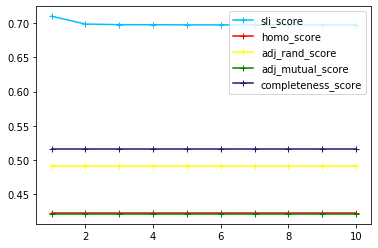

In [78]:
plot_graphs(pca_km_size, pca_km_scores, ["sli_score", "homo_score","adj_rand_score", "adj_mutual_score", "completeness_score"])

In [79]:
ica_km_size = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
l_ica_km = len(ica_km_size)
ica_km_scores = np.zeros((5,l_ica_km))
for i in range(l_ica_km):
    ica_km_scores[:,i] = k_means_dim_red(ica_features(ica_km_size[i]), n=2)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

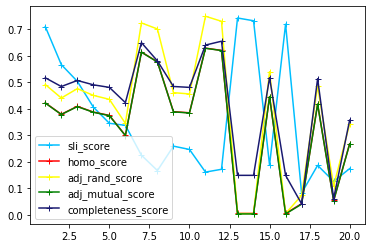

In [80]:
plot_graphs(ica_km_size, ica_km_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [81]:
rca_km_size = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
l_rca_km = len(rca_km_size)
rca_km_scores = np.zeros((5,200))
for i in range(200):
    rca_km_scores[:,i] = k_means_dim_red(rca_features(n=5,r=i), n=2)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

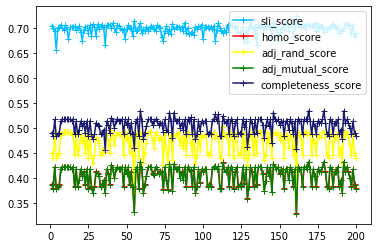

In [82]:
plot_graphs(range(1,201), rca_km_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [83]:
sp_km_size = [10,20,30,40,50,60,70,80,90,100]
l_sp_km = len(sp_km_size)
sp_km_scores = np.zeros((5,l_sp_km))
for i in range(l_sp_km):
    sp_km_scores[:,i] = k_means_dim_red(sp_features(p=sp_km_size[i]), n=2)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

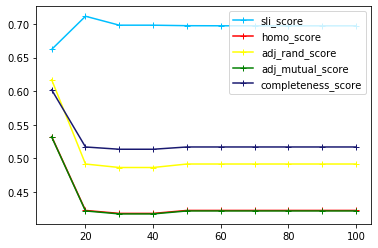

In [85]:
plot_graphs(sp_km_size, sp_km_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [62]:
def em_dim_red(x, n=3, cov='full', t=0.001, reg=1e-06, it=100, init='kmeans', w=None, means=None, pre=None, warm=False):
    
    em = GaussianMixture(n_components=n, covariance_type=cov, tol=t, reg_covar=reg, max_iter=it,
                        init_params=init, weights_init=w, means_init=means, precisions_init=pre,
                        random_state=5, warm_start=warm)
    
    em_predict = em.fit_predict(x)
    
    sli_score = silhouette_score(x, em_predict)
    homo_score = homogeneity_score(data_label, em_predict)
    adj_score = adjusted_rand_score(data_label, em_predict)
    adj_mut_score = adjusted_mutual_info_score(data_label, em_predict)
    comp_score = completeness_score(data_label, em_predict)
    
    r = np.zeros((1,5))
    r[0,0] = sli_score
    r[0,1] = homo_score
    r[0,2] = adj_score
    r[0,3] = adj_mut_score
    r[0,4] = comp_score
    return r

In [86]:
pca_em_size = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
l_pca_em = len(pca_em_size)
pca_em_scores = np.zeros((5,l_pca_em))
for i in range(l_pca_em):
    pca_em_scores[:,i] = em_dim_red(pca_features(pca_em_size[i]), n=2)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

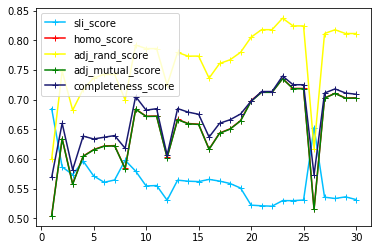

In [87]:
plot_graphs(pca_em_size, pca_em_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [88]:
ica_em_size = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
l_ica_em = len(ica_em_size)
ica_em_scores = np.zeros((5,l_ica_em))
for i in range(l_ica_em):
    ica_em_scores[:,i] = em_dim_red(ica_features(ica_em_size[i]), n=2)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

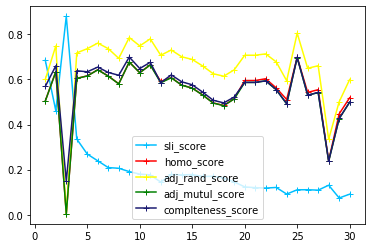

In [68]:
plot_graphs(ica_em_size, ica_em_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutul_score", "complteness_score"])

In [69]:
rca_em_size = [1,2,3,4]
l_rca_em = len(rca_em_size)
rca_em_scores = np.zeros((5,200))
for i in range(1,201):
    rca_em_scores[:,i] = em_dim_red(rca_features(n=5,r=i), n=2)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

IndexError: index 200 is out of bounds for axis 1 with size 200

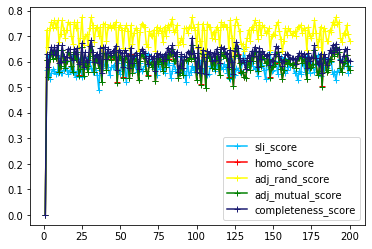

In [90]:
plot_graphs(range(1,201), rca_em_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [91]:
sp_em_size = [10,20,30,40,50,60,70,80,90,100]
l_sp_em = len(sp_em_size)
sp_em_scores = np.zeros((5,l_sp_em))
for i in range(l_sp_em):
    sp_em_scores[:,i] = em_dim_red(sp_features(p=sp_em_size[i]), n=2)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

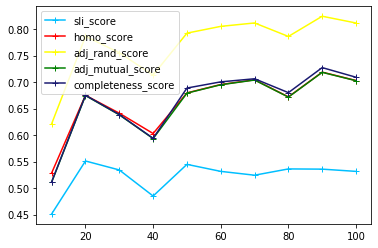

In [92]:
plot_graphs(sp_em_size, sp_em_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])